<a href="https://colab.research.google.com/github/bghata/Sentiment_Analysis/blob/master/Sentiment_Analysis_Camera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext rpy2.ipython

import warnings
warnings.filterwarnings('ignore')

In [0]:
%%R
install.packages("pacman")
library(pacman)

## Loading libraries

In [0]:
%%R
pacman::p_load(readr, dplyr, caret, ggplot2)

## Loading data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
%%R
iphone_data <- read_csv('/content/gdrive/My Drive/Colab Notebooks/AWS/iphone_smallmatrix_labeled_8d.csv')
galaxy_data <- read_csv('/content/gdrive/My Drive/Colab Notebooks/AWS/galaxy_smallmatrix_labeled_8d.csv')

## Extracting variables related to iphone and galaxy, excluding iphonesentiment

In [0]:
%%R
iphone_galaxy_data <- iphone_data %>% select(contains("iphone"),
                         contains("samsung"),
                         contains("ios"),
                         contains("google"))

In [0]:
%%R
iphone_galaxy_data$iphonesentiment <- NULL

In [0]:
%%R
iphone_galaxy_pos_neg <- iphone_galaxy_data %>% 
                          select(ends_with("pos"), 
                                 ends_with("neg"))

In [0]:
%%R
means <- colMeans(iphone_galaxy_pos_neg)

In [0]:
%%R
variable_names <-
  c("iphonecampos",
    "iphonedispos",
    "iphoneperpos",
    "samsungcampos",
    "samsungdispos",
    "samsungperpos",
    "osperpos",
    "googleperpos",
    "iphonecamneg",
    "iphonedisneg",
    "phoneperneg",
    "samsungcamneg",
    "samsungdisneg",
    "samsungperneg",
    "iosperneg",
    "googleperneg")

In [0]:
%%R
variables_means <-
  c(0.31042224,
    0.45769370,
    0.35116041,
    0.15103496,
    0.18437820,
    0.12386517,
    0.14027269,
    0.05222673,
    0.13825889,
    0.24489122,
    0.22158397,
    0.07807600,
    0.11316893,
    0.08411739,
    0.08626325,
    0.04149747)

In [0]:
%%R
variables_means2 <- data.frame(Feature = names(means), Mean = means, row.names = NULL)

In [0]:
%%R
variables_means2$Feature <- as.factor(variables_means2$Feature)

## Plotting positive reviews based on camera

In [0]:
%%R
cam_pos <- variables_means2[c(1,4),]

In [0]:
%%R
cam_pos$Phones <- c("iPhone", "Galaxy")

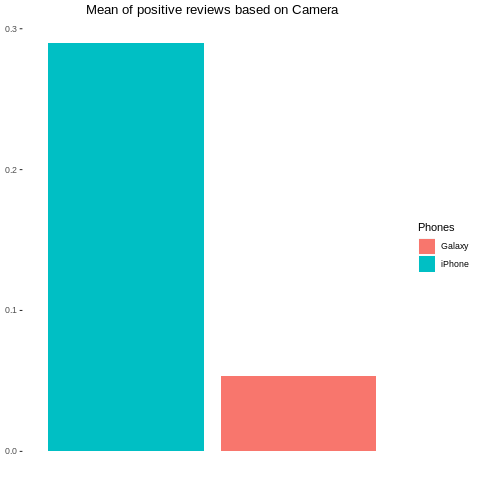

In [0]:
%%R
cam_pos_plot <- ggplot(cam_pos, aes(x = Feature, y = Mean, fill = Phones)) + 
  geom_bar(stat = "identity") +
  ggtitle("Mean of positive reviews based on Camera") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_blank(),  
        axis.text.x = element_blank(), 
        axis.ticks.x = element_blank(), 
        axis.title.y = element_blank(), 
        panel.background = element_blank(), 
        panel.grid = element_blank(), 
        plot.background = element_blank(), 
        strip.background = element_blank())

cam_pos_plot

**The plot shows that iPhone has by far more negative reviews based on camera compared to Samsung Galaxy**

## Plotting negative reviews based on camera

In [0]:
%%R
cam_neg <- variables_means2[c(9, 12),]

In [0]:
%%R
Phones <- c("iPhone", "Galaxy")

In [0]:
%%R
cam_neg <- cbind(Phones, cam_neg)

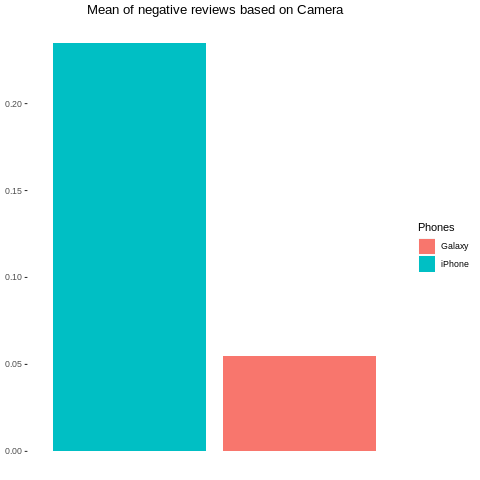

In [0]:
%%R
cam_neg_plot <- ggplot(cam_neg, aes(x = Feature, y = Mean, fill = Phones)) + 
  geom_bar(stat = "identity") +
  ggtitle("Mean of negative reviews based on Camera") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_blank(),  
        axis.text.x = element_blank(), 
        axis.ticks.x = element_blank(), 
        axis.title.y = element_blank(), 
        panel.background = element_blank(), 
        panel.grid = element_blank(), 
        plot.background = element_blank(), 
        strip.background = element_blank())

cam_neg_plot